# 00_Run_Scripts

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import scanpy as sc
import pandas as pd

# approximate original figure in http://spatial.libd.org/spatialLIBD/
palette_celltype={'L1':'#eb34a8',
                  'L2':'#3486eb',
                  'L3':'#34eb5b',
                  'L4':"#ae34eb",
                  'L5':'#ebdb34',
                  'L6':'#eb9234',
                  'WM':'#000000'}

palette_entity_anno = palette_celltype.copy()
palette_entity_anno['gene'] = "lightgray"

In [3]:
import simba as si

/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/cc_envs/cc_simba_only/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
si.settings.set_figure_params(
    dpi=80,
    style='white',
    fig_size=[5,5],
    rc={'image.cmap': 'viridis'}
)

from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('retina')

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tqdm
import seaborn as sns

In [6]:
from benchmarking.plot import generate_umap_figures, generate_pca_figures, combine_images

# Data

In [7]:
dlpfc_dir = '../data/human_DLPFC'

In [8]:
os.listdir(dlpfc_dir)

['151675.h5ad',
 '151507.h5ad',
 '151510.h5ad',
 '151674.h5ad',
 '151669.h5ad',
 '151673.h5ad',
 '151672.h5ad',
 '151671.h5ad',
 '151670.h5ad',
 '151509.h5ad',
 '151676.h5ad',
 '151508.h5ad']

from tutorial, included link to drive. Renamed the files to use the original IDs. Original sample order indices:
> sample_names=c("151507", "151508", "151509", "151510", "151669", "151670", "151671" ,"151672","151673", "151674" ,"151675" ,"151676")

In [9]:
R_dlpfc_dir = '../data/human_DLPFC_RData_Shang'
os.listdir(R_dlpfc_dir)

['151507.RData',
 '151675.RData',
 '151508.RData',
 '151671.RData',
 '151673.RData',
 '151674.RData',
 '151676.RData',
 '151672.RData',
 '151670.RData',
 '151509.RData',
 '151669.RData',
 '151510.RData']

In [10]:
python_path = '/Users/cchu/opt/anaconda3/envs/env_simba/bin/python'

# Methods

## PCA

```bash
./benchmarking/pca_rna.sh
```

In [11]:
pca_fn = "../results/00/pca_rna/run_pca.output.tsv"

## SpatialPCA

```bash
/data/pinello/PROJECTS/2025-01-31_CC_Spatial_SIMBA/SIMBA_in_space/scripts/benchmarking/spatialPCA.sh
```

In [14]:
from benchmarking.spatialPCA_to_py import convert_to_adata
spatialpca_dir = "../results/00/spatialpca"
spatialpca_to_py_fn = f"{spatialpca_dir}/spatialpca_adata_py.tsv"
spatialpca_to_py_fn


'../results/00/spatialpca/spatialpca_adata_py.tsv'

In [36]:
sample = '151510'
adata_fn = convert_to_adata(f"{spatialpca_dir}/{sample}")

../results/00/spatialpca/151510/spatialPCA_to_py.adata.h5ad


In [44]:
spatialpca_to_py_df = pd.DataFrame()
for sample in os.listdir(spatialpca_dir): 
    full_sample_dir = f"{spatialpca_dir}/{sample}"
    if os.path.isdir(full_sample_dir):
        adata_fn = convert_to_adata(full_sample_dir)
        spatialpca_to_py_df.loc[sample, 'spatialPCA_adata_fn'] = adata_fn

spatialpca_to_py_df.to_csv(spatialpca_to_py_fn, sep='\t')

../results/00/spatialpca/151507/spatialPCA_to_py.adata.h5ad
../results/00/spatialpca/151508/spatialPCA_to_py.adata.h5ad
../results/00/spatialpca/151509/spatialPCA_to_py.adata.h5ad
../results/00/spatialpca/151510/spatialPCA_to_py.adata.h5ad
../results/00/spatialpca/151669/spatialPCA_to_py.adata.h5ad
../results/00/spatialpca/151670/spatialPCA_to_py.adata.h5ad
../results/00/spatialpca/151671/spatialPCA_to_py.adata.h5ad
../results/00/spatialpca/151672/spatialPCA_to_py.adata.h5ad
../results/00/spatialpca/151673/spatialPCA_to_py.adata.h5ad
../results/00/spatialpca/151674/spatialPCA_to_py.adata.h5ad
../results/00/spatialpca/151675/spatialPCA_to_py.adata.h5ad
../results/00/spatialpca/151676/spatialPCA_to_py.adata.h5ad


In [46]:
spatialpca_to_py_df

,spatialPCA_adata_fn
151507,../results/00/spatialpca/151507/spatialPCA_to_...
151508,../results/00/spatialpca/151508/spatialPCA_to_...
151509,../results/00/spatialpca/151509/spatialPCA_to_...
151510,../results/00/spatialpca/151510/spatialPCA_to_...
151669,../results/00/spatialpca/151669/spatialPCA_to_...
151670,../results/00/spatialpca/151670/spatialPCA_to_...
151671,../results/00/spatialpca/151671/spatialPCA_to_...
151672,../results/00/spatialpca/151672/spatialPCA_to_...
151673,../results/00/spatialpca/151673/spatialPCA_to_...
151674,../results/00/spatialpca/151674/spatialPCA_to_...


In [42]:
import scanpy as sc
import matplotlib

print(sc.__version__)  # Check scanpy version
print(matplotlib.__version__)  # Check matplotlib version


1.10.2
3.10.0


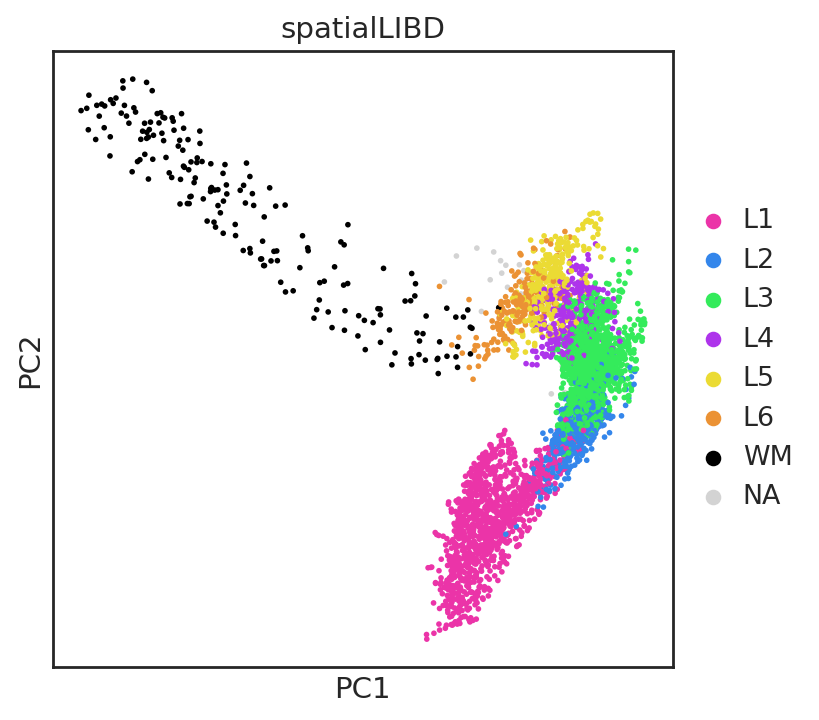

In [43]:
fig = sc.pl.pca(
    adata, color=["spatialLIBD"], palette=palette_celltype, 
    dimensions=(0, 1),
    return_fig=True,
    show=True,
)

## SIMBA RNA only

In [31]:
! benchmarking/simba_rna_only.sh

/Users/cchu/opt/anaconda3/envs/env_simba/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/Users/cchu/opt/anaconda3/envs/env_simba/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/Users/cchu/opt/anaconda3/envs/env_simba/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  warnings.warn(msg, FutureWarning)
/Users/cchu/opt/anaconda3/envs/env_simba/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/Users/cchu/opt/anaconda3/envs/env_simba/lib/python3.11/site-packages/anndata/util

In [12]:
simba_rna_only_output_fn = "../results/00/simba_rna_only/run_simba_rna_only.output.tsv"

## SIMBA Spatial only

```bash
! benchmarking/simba_spatial_only.sh
```

In [1]:
simba_spatial_fn = "../results/00/simba_spatial_only/run_simba_spatial_only.output.tsv"